In [ ]:
pip install numba

Note: you may need to restart the kernel to use updated packages.


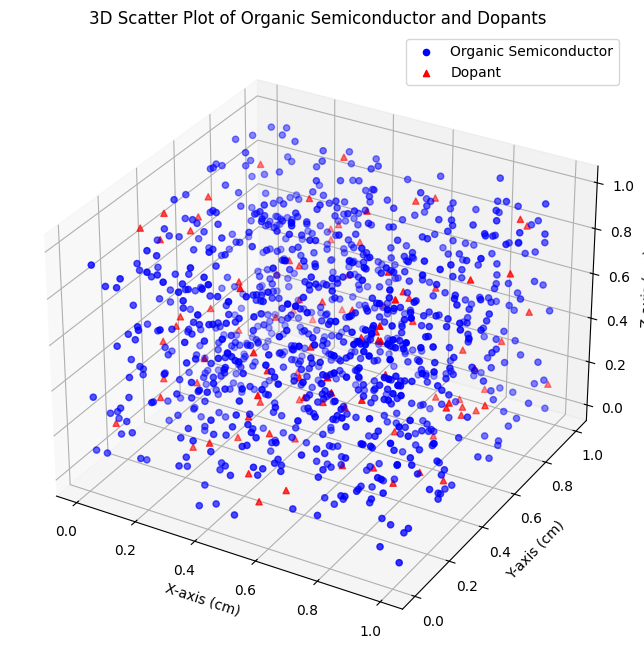

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to generate random points
def generate_points(concentration, volume, num_points):
    points = []
    while len(points) < num_points:
        point = np.random.uniform(0, volume, 3)
        if not any(np.allclose(point, p, atol=1e-3) for p in points):
            points.append(point)
    return np.array(points)

# Function to plot the points
def plot_points(organic_points, dopant_points):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(organic_points[:, 0], organic_points[:, 1], organic_points[:, 2], c='b', marker='o', label='Organic Semiconductor')
    ax.scatter(dopant_points[:, 0], dopant_points[:, 1], dopant_points[:, 2], c='r', marker='^', label='Dopant')

    ax.set_xlabel('X-axis (cm)')
    ax.set_ylabel('Y-axis (cm)')
    ax.set_zlabel('Z-axis (cm)')
    ax.set_title('3D Scatter Plot of Organic Semiconductor and Dopants')
    ax.legend()

    plt.show()

organic_concentration = 1000  # per cm³
dopant_concentration = 100   # per cm³

volume = 1

# Calculate the number of points for each set (assuming we're working in 1 cm³ space)
organic_points_count = int(organic_concentration * volume**3)  # Total points in the space
dopant_points_count = int(dopant_concentration * volume**3)

# Generate random points for organic semiconductor and dopants
organic_points = generate_points(organic_concentration, volume, organic_points_count)
dopant_points = generate_points(dopant_concentration, volume, dopant_points_count)

# Visualize the points
plot_points(organic_points, dopant_points)


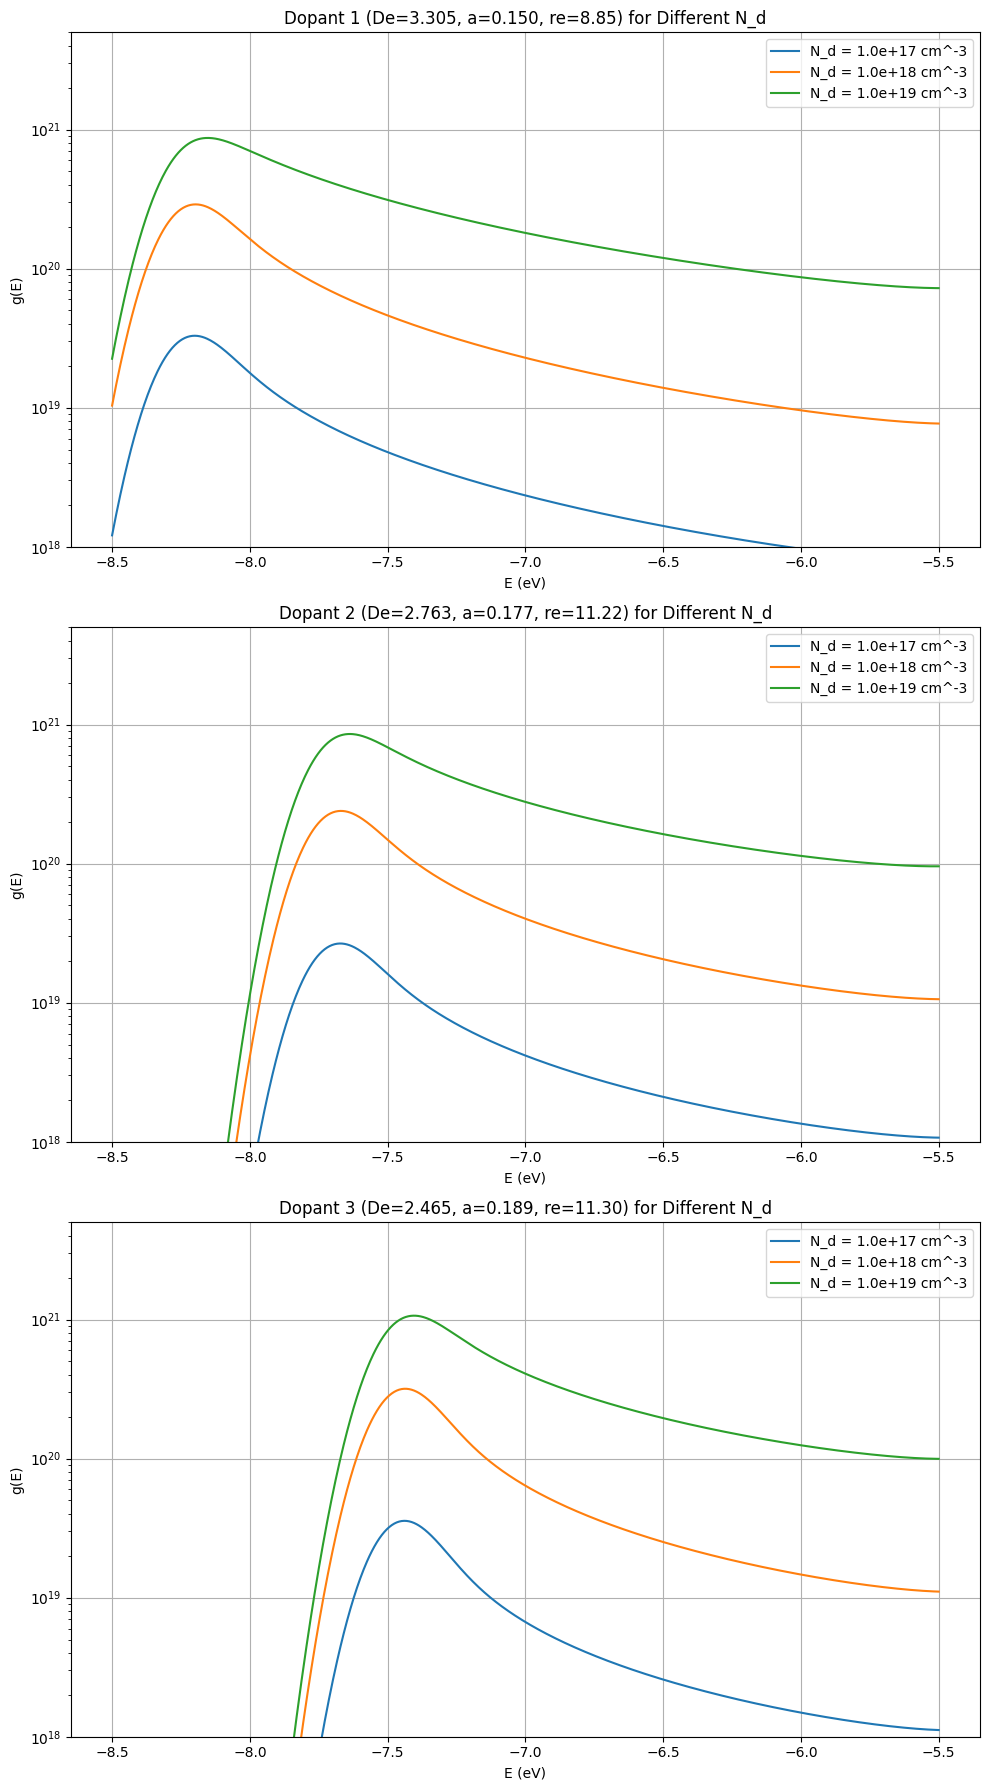

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
mu = -5.1  # eV
S_squared = 0.01  # eV^2
S = 0.1

# Dopant 1 (Dataset 1)
De_1 = 3.305  # eV
a_1 = 0.150  # cm
re_1 = 8.85  # cm
V_min_1 = -3.19  # eV
V_max_1 = 0  # eV

# Dopant 2 (Dataset 2)
De_2 = 2.763  # eV
a_2 = 0.177  # cm
re_2 = 11.22  # cm
V_min_2 = -2.66  # eV
V_max_2 = 0  # eV

# Dopant 3 (Dataset 3)
De_3 = 2.465  # eV
a_3 = 0.189  # cm
re_3 = 11.30  # cm
V_min_3 = -2.41  # eV
V_max_3 = 0  # eV

# Function to integrate (using your g(E) equation)
def g_E_integrand(V, E, De, a, re, Nd_cm3):
    term1 = 4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared) * ((re) - (1 / (a)) * np.log(1 - np.sqrt(abs(V) / De))) ** 2
    term2 = np.abs(1 / (2 * (a) * (De * np.sqrt(abs(V) / De) - abs(V))))
    term3 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a)) * np.log(1 - np.sqrt(abs(V) / De))) ** 3)
    term4 = np.exp(-0.5 * ((E + abs(V) - mu) ** 2) / S_squared)
    return term1 * term2 * term3 * term4 * 1e21

# List of N_d values to plot
Nd_values = [1.0e17, 1.0e18, 1.0e19]

# Compute g(E) for each dopant and for a range of E values
E_values = np.linspace(-8.5, -5.5, 1000)

# Create subplots for each dopant
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for Dataset 1 (Dopant 1)
for Nd_cm3 in Nd_values:
    g_E_values_1 = [quad(g_E_integrand, V_min_1, V_max_1, args=(E, De_1, a_1, re_1, Nd_cm3))[0] for E in E_values]
    axes[0].plot(E_values, g_E_values_1, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[0].set_xlabel('E (eV)')
axes[0].set_yscale('log')
axes[0].set_ylabel('g(E)')
axes[0].set_title('Dopant 1 (De=3.305, a=0.150, re=8.85) for Different N_d')
axes[0].legend()
axes[0].set_ylim(1e18, 5e21)
axes[0].grid()

# Plot for Dataset 2 (Dopant 2)
for Nd_cm3 in Nd_values:
    g_E_values_2 = [quad(g_E_integrand, V_min_2, V_max_2, args=(E, De_2, a_2, re_2, Nd_cm3))[0] for E in E_values]
    axes[1].plot(E_values, g_E_values_2, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[1].set_xlabel('E (eV)')
axes[1].set_yscale('log')
axes[1].set_ylabel('g(E)')
axes[1].set_title('Dopant 2 (De=2.763, a=0.177, re=11.22) for Different N_d')
axes[1].legend()
axes[1].set_ylim(1e18, 5e21)
axes[1].grid()

# Plot for Dataset 3 (Dopant 3)
for Nd_cm3 in Nd_values:
    g_E_values_3 = [quad(g_E_integrand, V_min_3, V_max_3, args=(E, De_3, a_3, re_3, Nd_cm3))[0] for E in E_values]
    axes[2].plot(E_values, g_E_values_3, label=f'N_d = {Nd_cm3:.1e} cm^-3')

axes[2].set_xlabel('E (eV)')
axes[2].set_yscale('log')
axes[2].set_ylabel('g(E)')
axes[2].set_title('Dopant 3 (De=2.465, a=0.189, re=11.30) for Different N_d')
axes[2].legend()
axes[2].set_ylim(1e18, 5e21)
axes[2].grid()

plt.tight_layout()
plt.show()


/var/tmp/ipykernel_8558/3547229138.py:29: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E,))[0] for E in E_values]


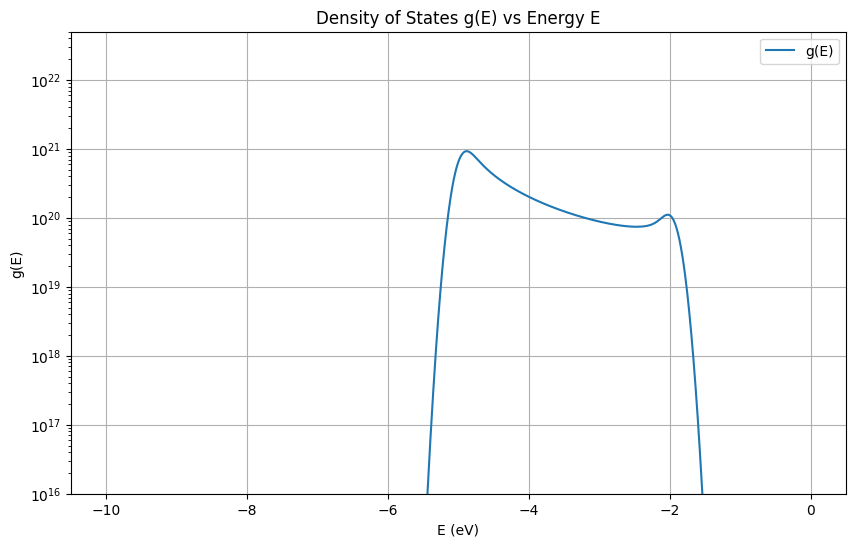

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
Nd_cm3 = 1e19  # cm^-3
a_cm = 0.170  # cm
De = 3.161  # eV
S = 0.1
re = 8.85 # cm
V_min = -De # eV
V_max = -0.1  # eV
mu=-5.1
# Function to integrate (using your g(E) equation)
def g_E_integrand(V, E):

    term11 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 - np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term12 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 + np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term22 = 1 / np.abs(2 * a_cm * De * (1 + np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 - np.sqrt(1 + (V / De)))/a_cm))**3)
    term32 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 + np.sqrt(1 + (V / De)))/a_cm))**3)
    term = np.exp(-((E + V - mu) ** 2)/(2*S**2))/ np.sqrt(2 * np.pi * S**2)

    return  ((term11*term21*term31)+(term12*term22*term32))*term*1e21

# Compute g(E) for a range of E values
E_values = np.linspace(-10,0, 1000)
g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E,))[0] for E in E_values]

# Plot g(E) vs E
plt.figure(figsize=(10, 6))
plt.plot(E_values, g_E_values, label='g(E)')
plt.xlabel('E (eV)')
plt.yscale('log')
plt.ylabel('g(E)')
plt.title('Density of States g(E) vs Energy E')
plt.legend()
plt.ylim(1e16,5e22)
plt.grid()
plt.show()


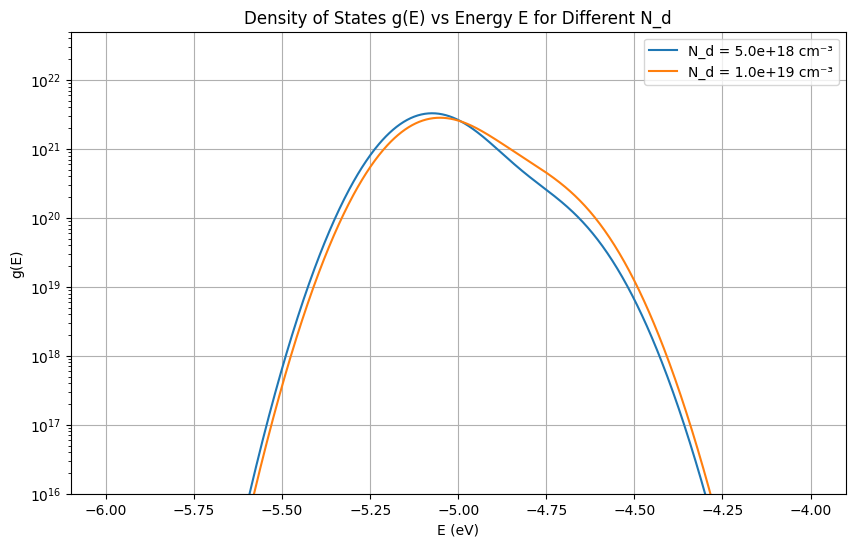

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
a_cm = 0.191
De = 0.411
S = 0.1
re = 11.30
V_min = -De
V_max = 0
mu = -5.1

Nd_values = [5e18,1e19]

# Energy range
E_values = np.linspace(-6, -4, 1000)

plt.figure(figsize=(10, 6))

# Function to integrate (g(E))
def g_E_integrand(V, E,Nd_cm3):

    term11 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 - np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term12 = (4 * np.pi * (Nd_cm3*1e-24)*(re- np.log(1 + np.sqrt(1 + (V / De)))/a_cm) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term22 = 1 / np.abs(2 * a_cm * De * (1 + np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 - np.sqrt(1 + (V / De)))/a_cm))**3)
    term32 = np.exp(- (4/3)*np.pi * (Nd_cm3 * 1e-24) * (re- (np.log(1 + np.sqrt(1 + (V / De)))/a_cm))**3)
    term = np.exp(-((E + V - mu) ** 2)/(2*S**2))*1e21/ (np.sqrt(2 * np.pi )*S)

    return  ((term11*term21*term31)-(term12*term22*term32))*term

# Compute g(E) for each Nd and plot
for Nd_cm3 in Nd_values:
    g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values]
    plt.plot(E_values, g_E_values, label=f'N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('g(E)')
plt.yscale('log')
plt.title('Density of States g(E) vs Energy E for Different N_d')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()

/var/tmp/ipykernel_16350/1792596713.py:38: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values])


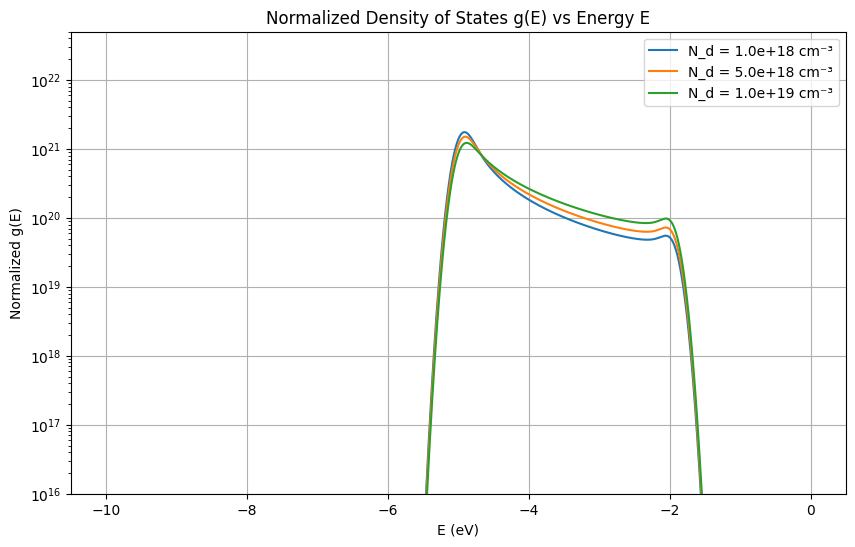

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Constants
a_cm = 0.170
De = 3.161
S_squared = 0.01
S = np.sqrt(S_squared)
re = 8.85
V_min = -De
V_max = -0.1
mu = -5.1

Nd_values = [1.0e18,5e18,1e19]

# Energy range
E_values = np.linspace(-10, 0, 2000)

plt.figure(figsize=(10, 6))

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3):
    term1 = (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) * \
            ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2

    term2 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))

    term3 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * \
                   ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3)

    term4 = np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared)

    return term1 * term2 * term3 * term4

# Compute g(E) for each Nd and normalize
for Nd_cm3 in Nd_values:
    g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3))[0] for E in E_values])

    # Compute normalization factor
    total_integral = np.trapz(g_E_values, E_values)
    g_E_values *= (1e21 / total_integral)  # Normalize to 10^21

    plt.plot(E_values, g_E_values, label=f'N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('Normalized g(E)')
plt.yscale('log')
plt.title('Normalized Density of States g(E) vs Energy E')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()


In [ ]:
S = 0.15
mu = -5.2  # eV
a_cm = 0.148
re =8.540
De=0.542
V=-De/100000
Nd_values = [1.5e18]
term1 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
term2 = np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
print(term1/term2)

194649.0695622311


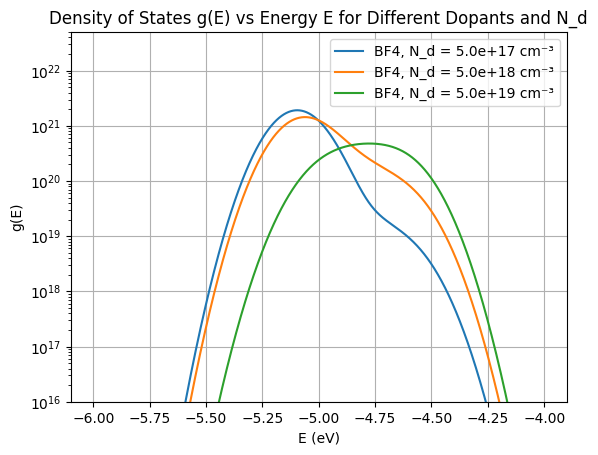

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/3, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    #"BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
S=0.1
mu = -5.1  # eV
Nd_values = [5e17,5e18, 5e19]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):
    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term

# Compute and plot g(E) for each dopant and N_d
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
        plt.plot(E_values, g_E_values, label=f'{dopant}, N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('g(E)')
plt.yscale('log')
plt.title('Density of States g(E) vs Energy E for Different Dopants and N_d')
plt.legend()
plt.ylim(1e16, 5e22)
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/6, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    "BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
mu = -5.1  # eV
Nd_values = [5e17,5e18,5e19,2e20]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range
# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):
    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term

# Compute and plot normalized g(E)
plt.figure(figsize=(8,6))
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    for Nd_cm3 in Nd_values:
        g_E_values = np.array([quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values])

        # Normalize g(E) by dividing by its maximum value
        g_E_max = np.max(g_E_values)  # Find maximum value
        g_E_normalized = g_E_values *5e20/ g_E_max  # Normalize

        plt.plot(E_values, g_E_normalized, label=f'{dopant}, N_d = {Nd_cm3:.1e} cm⁻³')

# Plot settings
plt.xlabel('E (eV)')
plt.ylabel('Normalized g(E)')
plt.yscale('linear')  # Keep it linear for better visibility
plt.title('Normalized Density of States g(E) vs Energy E')
plt.yscale('log')
plt.legend()
plt.ylim(1e16, 1e22)  # Normalized values are between 0 and 1
plt.grid()
plt.show()


In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161/6, "re": 8.85, "V_min": -3.161/6, "V_max": 0},
    #"BARF": {"a_cm":0.191, "De": 2.465/6, "re": 11.30, "V_min": -2.465/6, "V_max": 0},
}
S_squared = 0.01  # eV^2
S=0.1
mu = -5.1  # eV
Nd_values = [5e17,5e18, 5e19]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range

# Function to integrate (g(E))
def g_E_integrand(V, E, Nd_cm3, a_cm, De, re):
    term11 = (4 * np.pi * (Nd_cm3 / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De)))) ** 2)
    term21 = 1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))
    term31 = np.exp(- (4 / 3) * np.pi * (Nd_cm3 / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3)

    term = np.exp(-((E + V - mu) ** 2) / (2 * (S ** 2))) * 5e20 / (np.sqrt(2 * np.pi) * S )

    return ((term11 * term21 * term31)) * term
# Function to calculate the work function
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i-1]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
        work_function = calculate_work_function(g_E_normalized, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_val = ( list(work_function_results[dopant].keys()))
    Wf_val = (list(work_function_results[dopant].values()))
    plt.plot(Nd_val, Wf_val, marker='o', linestyle='-', label=f'{dopant}')

#plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()

/var/tmp/ipykernel_11309/986887783.py:48: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E in E_values]
/var/tmp/ipykernel_11309/986887783.py:48: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  g_E_values = [quad(g_E_integrand, V_min, V_max, args=(E, Nd_cm3, a_cm, De, re))[0] for E

NameError: name 'g_E_normalized' is not defined

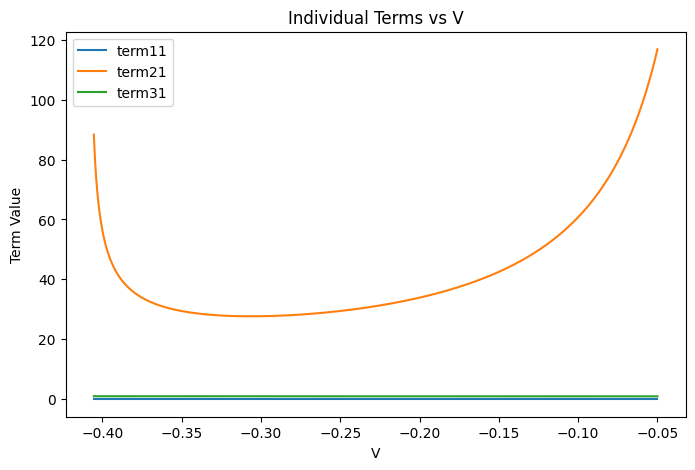

In [ ]:
a_cm:0.177
De: 0.8083
re: 10.30
V_values = np.linspace(-De+0.003, -0.05, 1000)
term11_values = [4 * np.pi * (Nd_values[0] / 1e24) * (re - (1/a_cm)*np.log(1 - np.sqrt(1 + (V / De))))**2 for V in V_values]
term21_values = [1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De)))) for V in V_values]
term31_values = [np.exp(- (4 / 3) * np.pi * (Nd_values[0] / 1e24) * (re - (np.log(1 - np.sqrt(1 + (V / De))) / a_cm)) ** 3) for V in V_values]

plt.figure(figsize=(8, 5))
plt.plot(V_values, term11_values, label="term11")
plt.plot(V_values, term21_values, label="term21")
plt.plot(V_values, term31_values, label="term31")
plt.legend()
plt.xlabel("V")
plt.ylabel("Term Value")
plt.title("Individual Terms vs V")
plt.show()


In [ ]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
# Define parameters for two dif ferent dopants
dopants = {
#"BARF1": {"a_cm":0.166, "De": 2.342/6, "re": 10.241, "V_min": -2.342/12, "V_max": 0},

   "BF4": {
    "a_cm": 0.150,
    "De": 3.05/6,
    "re": 8.54,
    "V_min": -3.05/(12),
    "V_max": 0
}
}

S=0.1
S_squared= S**2  # eV^2
mu = -5.3  # Slightly less negative, was -5.32
Nd_values = [5e17,5e18,5e19]  # Different doping densities
E_values = np.linspace(-6, -4, 5000)  # Energy range


# Function to calculate the work function
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
                           ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
                           (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
                           np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
                           np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared) * 5e20,
                           V_min, V_max, args=(E,))[0] for E in E_values]

        work_function = calculate_work_function(g_E_values, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_vals= list(work_function_results[dopant].keys())
    Wf_vals= list(work_function_results[dopant].values())
    plt.plot(Nd_vals, Wf_vals, marker='o', linestyle='-', label=f'{dopant}')

#plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


BF4, N_d = 5.0e+17 cm⁻³: Work Function = 4.9490 eV
BF4, N_d = 5.0e+18 cm⁻³: Work Function = 4.9678 eV


SyntaxError: incomplete input (<ipython-input-2-5e1840f92192>, line 161)

In [ ]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

# Define parameters for two different dopants
dopants = {
    "BF4": {"a_cm": 0.170, "De": 3.161, "re": 8.85, "V_min": -3.161, "V_max": 0},
    "BARF": {"a_cm":0.191, "De": 2.465, "re": 11.30, "V_min": -2.465, "V_max": 0},
}
S_squared = 0.01  # eV^2
mu = -5.1  # eV
Nd_values = [5e13,5e17,1.5e18,2.5e18,3.5e18,5e18]  # Different doping densities
E_values = np.linspace(-10, 0, 1000)  # Energy range

# Function to calculate the work function by accumulating from higher energies
def calculate_work_function(g_E_values, E_values, Nd):
    accumulated_value = 0
    stopping_energy = None
    interval = np.abs(E_values[1] - E_values[0])

    for i in range(len(E_values) - 1, 0, -1):  # Accumulate from higher to lower energy
        accumulated_value += ((g_E_values[i] + g_E_values[i - 1]) / 2) * interval
        if accumulated_value >= Nd:
            stopping_energy = E_values[i]
            break

    if stopping_energy is not None:
        return 0 - stopping_energy  # Work function = stopping energy - 0
    else:
        return None  # If accumulation never reaches Nd

# Compute and print the work function for each dopant and N_d
work_function_results = {}
for dopant, params in dopants.items():
    a_cm, De, re, V_min, V_max = params.values()
    work_function_results[dopant] = {}
    for Nd_cm3 in Nd_values:
        g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
                           ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
                           (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
                           np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
                           np.exp(-0.5 * ((E + V - mu) ** 2) / S_squared) * 2e21,
                           V_min, V_max, args=(E,))[0] for E in E_values]

        work_function = calculate_work_function(g_E_values, E_values, Nd_cm3)
        work_function_results[dopant][Nd_cm3] = work_function
        print(f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function = {work_function:.4f} eV" if work_function else f"{dopant}, N_d = {Nd_cm3:.1e} cm⁻³: Work Function not found")

# Plot Work Function vs Dopant Concentration
plt.figure(figsize=(8, 6))
for dopant in work_function_results:
    Nd_vals = list(work_function_results[dopant].keys())
    Wf_vals = list(work_function_results[dopant].values())
    plt.plot(Nd_vals, Wf_vals, marker='o', linestyle='-', label=f'{dopant}')

plt.xscale('log')
plt.xlabel('Dopant Concentration (cm⁻³)')
plt.ylabel('Work Function (eV)')
plt.title('Work Function vs Dopant Concentration')
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.show()


/var/tmp/ipykernel_15454/4180144961.py:39: RuntimeWarning: divide by zero encountered in log
  ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 2 *
/var/tmp/ipykernel_15454/4180144961.py:40: RuntimeWarning: divide by zero encountered in scalar divide
  (1 / np.abs(2 * a_cm * De * (1 - np.sqrt(1 + (V / De))) * (np.sqrt(1 + (V / De))))) *
/var/tmp/ipykernel_15454/4180144961.py:41: RuntimeWarning: divide by zero encountered in log
  np.exp(- (4 / 3) * np.pi * (Nd_cm3 * 1e-24) * ((re) - (1 / (a_cm)) * np.log(1 - np.sqrt(1 + (V / De)))) ** 3) *
/var/tmp/ipykernel_15454/4180144961.py:38: RuntimeWarning: invalid value encountered in scalar multiply
  g_E_values = [quad(lambda V, E: (4 * np.pi * (Nd_cm3 * 1e-24) / np.sqrt(2 * np.pi * S_squared)) *
/var/tmp/ipykernel_15454/4180144961.py:38: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the 

BF4, N_d = 5.0e+13 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 5.0e+17 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 1.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 2.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 3.5e+18 cm⁻³: Work Function = 1.9319 eV
BF4, N_d = 5.0e+18 cm⁻³: Work Function = 1.9319 eV
BARF, N_d = 5.0e+13 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 5.0e+17 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 1.5e+18 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 2.5e+18 cm⁻³: Work Function = 2.5826 eV
BARF, N_d = 3.5e+18 cm⁻³: Work Function = 2.5926 eV
BARF, N_d = 5.0e+18 cm⁻³: Work Function = 2.5926 eV


KeyboardInterrupt: 